In [2]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
with open('D:/playdata_mini_proj/data/vectors_dim_rdct.pickle', 'rb') as file:
        vectors = pickle.load(file)

In [3]:
vectors.head()

,result
0,"[0.3915610070263306, -0.5062006945469069, -0.7..."
1,"[-2.3094912469710387, -0.33757848864255446, 0...."
2,"[0.2420800958019111, 0.1749625825843462, 0.362..."
3,"[-0.6100510721893547, -0.91517124653344, -1.11..."
4,"[0.2420800958019111, 0.1749625825843462, 0.362..."


In [3]:
with open('D:/playdata_mini_proj/data/RSS_for_keybert_remove_trash.pickle', 'rb') as file:
        keys = pickle.load(file)

In [5]:
len(keys) == len(vectors)

True

In [6]:
keys.head(50)

,Unnamed: 0,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd,url_ifo
0,0,20230102,NGS,Hoak & Co. Urges NGS Board to Halt CEO Search ...,Investing,Fintel,"Fintel reports that Hoak Public Equities, LP, ...",NGS,https://www.nasdaq.com/articles/hoak-co.-urges...
1,1,20230102,PFX,Here's Why PhenixFIN (PFX) is Poised for a Tur...,"Stocks,Investing",Zacks,PhenixFIN has been beaten down lately with to...,PFX,https://www.nasdaq.com/articles/heres-why-phen...
2,2,20230102,TYG,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"FEN,TYG",https://www.nasdaq.com/articles/my-advice-sell...
3,3,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...
4,4,20230102,FEN,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"FEN,TYG",https://www.nasdaq.com/articles/my-advice-sell...
5,5,20230102,NUVL,Are Medical Stocks Lagging DICE Therapeutics ...,"Stocks,Investing",Zacks,Investors interested in Medical stocks should ...,"NUVL,DICE",https://www.nasdaq.com/articles/are-medical-st...
6,6,20230102,ZH,Zhihu Appoints Henry Dachuan Sha As CFO,Markets,RTTNews,"- Zhihu Inc. , a Chinese online content commu...",ZH,https://www.nasdaq.com/articles/zhihu-appoints...
7,7,20230102,SCPH,"scPharmaceuticals, Inc. (SCPH) Is a Great Choi...","Stocks,Investing",Zacks,"""When it comes to short-term investing or trad...",SCPH,https://www.nasdaq.com/articles/scpharmaceutic...
8,8,20230102,FRBK,Raymond James & Associates Makes Revised Propo...,Investing,Fintel,Fintel reports that Norcross George E Iii has ...,FRBK,https://www.nasdaq.com/articles/raymond-james-...
9,9,20230102,IVVD,"Invivyd, Inc. (IVVD) Upgraded to Buy: Here's Why","Stocks,Investing",Zacks,"Investors might want to bet on Invivyd, Inc. ,...",IVVD,https://www.nasdaq.com/articles/invivyd-inc.-i...


In [14]:
vectors.head(1)

,result
0,"[0.3915610070263306, -0.5062006945469069, -0.7..."


In [4]:
dt_fc = pd.read_csv('D:/playdata_mini_proj/data/NASDAQ_DT_FC_STK_QUT.csv', encoding='ANSI')
dt_fc.head()

,trd_dt,tck_iem_cd,gts_iem_ong_pr,gts_iem_hi_pr,gts_iem_low_pr,gts_iem_end_pr,gts_acl_trd_qty,gts_sll_cns_sum_qty,gts_byn_cns_sum_qty
0,20230103,NVDA,148.5100,149.9600,140.9600,143.1500,40127658.0,0.0,0.0
1,20230103,APLT,0.7535,0.7900,0.7308,0.7522,63714.0,19658.0,44056.0
2,20230103,ANY,1.8900,2.0293,1.8354,1.9600,24896.4,0.0,0.0
3,20230103,CLRB,1.6600,1.7200,1.6300,1.6300,21212.0,16444.0,4768.0
4,20230103,NYMTM,18.4300,18.7400,18.4300,18.7000,8061.0,0.0,0.0


In [8]:
len(keys[(keys.rgs_dt == 20230103) & (keys.tck_iem_cd == 'TCS')])

1

In [9]:
len(keys[(keys.rgs_dt == 20230103) & (keys.tck_iem_cd == 'APLT')])

0

In [18]:
i = 0
while i < len(keys):
    target = dt_fc[(dt_fc.trd_dt == keys['rgs_dt'][i]+1) & (dt_fc.tck_iem_cd == keys['tck_iem_cd'][i])]
    if len(target) > 1:
        print(i)
        print(target)
        break
    else:
        i+=1

In [ ]:
vec_chng = pd.DataFrame(columns=['vector','change'])
index = 0

for i in range(len(keys)):
    target = dt_fc[(dt_fc.trd_dt == keys['rgs_dt'][i]+1) & (dt_fc.tck_iem_cd == keys['tck_iem_cd'][i])]
    if len(target) > 0 :
        d.loc[index] = [vectors['result'][i],dt_fc['gts_iem_ong_pr'][i] - dt_fc['gts_iem_end_pr'][i]]
        index += 1

In [21]:
d

,a,b
0,"[-0.6100510721893547, -0.91517124653344, -1.11...",0.0300
1,"[-0.9040271306648968, 1.5752651999242702, -0.5...",0.2000
2,"[0.5451634626817542, 0.09860787324536537, 0.13...",0.0200
3,"[-1.5157850235618184, 1.7362131345084257, -2.3...",-0.1000
4,"[-0.804256054191387, -0.054390197240750296, -0...",0.3100
...,...,...
43881,"[-1.4009464258982816, -2.1042705465527427, 0.0...",-0.2400
43882,"[-2.3799723252820004, -4.845891008664313, 0.84...",0.7790
43883,"[1.1363256610190482, -0.2926051330917864, 0.09...",-0.3885
43884,"[0.6920492201215583, 1.6149944776195508, 0.305...",0.1800


In [98]:
with open('D:/playdata_mini_proj/data/vec_chng.pickle', 'wb') as file:
        pickle.dump(d, file)

In [3]:
with open('D:/playdata_mini_proj/data/vec_chng.pickle', 'rb') as file:
        d = pickle.load(file)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, accuracy_score

# 데이터 로드 및 전처리
X = np.concatenate(d['a'].values, axis=0).reshape(43886, 300)
y = d['b'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.32, random_state=0)

# 적어도 상승 하락은 맞춰야! (폭 까지는 무리더라도..)
def custom_loss(y_true, y_pred):
    
    # 에러 절대값 계산
    error = tf.abs(y_true - y_pred)
    # 에러를 기반으로 가중치 생성 (이상치에 가중치 부여)
    weights = tf.where(y_true * y_pred > 0, 1.5, 1.0)
    # 가중 평균 손실 계산
    loss = tf.reduce_mean(weights * tf.square(error))
    
    return loss

# 모델 정의
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(300,)),
        tf.keras.layers.Dense(32, activation='relu'),#,kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1, activation='tanh')
    ])
    
    # 모델 컴파일
    model.compile(optimizer='adam', loss=custom_loss)

    return model

model = create_model()

history = model.fit(X_train, y_train, epochs=32, batch_size=128, validation_data=(X_valid, y_valid), verbose=1)


# Train loss와 Validation loss를 리스트에 추가
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(valid_loss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()

print("test loss",model.evaluate(X_test, y_test))

4/4 [==============================] - 0s 4ms/step


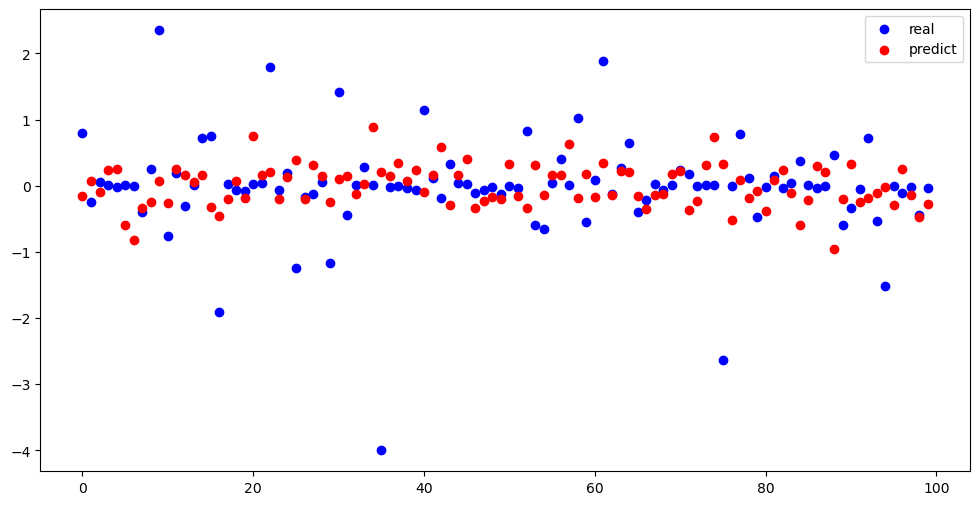

In [65]:
plt.figure(figsize=(12, 6))

plt.scatter(range(len(X_test[200:300])),y_test[200:300], label='real', color='b')
plt.scatter(range(len(X_test[200:300])),model.predict(X_test[200:300]), label='predict', color='r')

plt.legend()